# Project 1

In [2]:
#import section
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import timeit

In [3]:
# Linear regression using gradient descent
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def least_squares_GD(y, tx, initial_w,max_iters, gamma):
    N, D = tx.shape
    
    # Iterations of gradient descent
    w = initial_w
    for _ in range(max_iters):
        grad = -np.dot(tx.T, (y - np.dot(tx,w))) / N
        w = w - gamma * grad
        
    # Calculating the loss
    r = y - np.dot(tx,w)
    loss = np.dot(r,r) / (2*N)
    
    return w, loss

In [4]:
#Linear regression using stochastic gradient descent
def least_squares_SGD(y, tx, initial_w,max_iters, gamma, frequency=0):
    N, D = tx.shape
    
    loss = []
    
    
    # Iterations of stochastic gradient descent
    w = initial_w
    for i in range(max_iters):
        k = random.randint(0,N-1)
        grad = -(y[k]-np.dot(tx[k,:], w))*tx[k,:]
        w = w - gamma * grad
        # Calculating the loss
        if frequency != 0 and i % frequency == 0:
            r = y - np.dot(tx,w)
            loss.append(np.dot(r,r) / (2*N))
            
    r = y - np.dot(tx,w)
    loss.append(np.dot(r,r) / (2*N))        
    
    return w, loss


In [5]:
#Least squares regression using normal equations
def least_squares(y, tx):
    N, _ = tx
    
    # Calculating w
    w = (np.linalg.inv((tx.T).dot(tx)).dot(tx.T)).dot(y)
    
    #Calculating loss
    r = y - tx.dot(w_opt)
    loss = np.dot(r,r)/(2*N)
    return w_opt, loss

In [6]:
#Ridge regression using normal equations
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
#lambda_:     regularization parameter

def ridge_regression(y, tx, lambda_):
    N,D = tx.shape
    
    A = np.dot(tx.T, tx) + lambda_ * np.ones(D)
    B = np.linalg.inv(A)
    w = np.dot(np.dot(B,tx.T), y)
    
    # Calculating loss
    r = y - np.dot(tx,w)
    loss = (np.dot(r,r)+ lambda_ * np.dot(w,w)) / (2*N)
    
    return w, loss
    
    

In [7]:
# Returns exp(x)/(1+exp(x))
# x is scalar or numpy array
def sigmoid(x):
    tmp = np.exp(-x)
    return 1/(1+tmp)



#Logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss
def logistic_regression(y, tx, initial_w,max_iters, gamma):
    N, _ = tx.shape
    w = initial_w
    
    for _ in range(max_iter):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)


def logistic_regression_GD(y, tx, initial_w,max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx)
        w = w - gamma*grad
    
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return (w, loss)

In [8]:
#Regularized logistic regression using SGD
# y:          vector of outputs (dimension N)
# tx:         matrix of data (dimension N x D), such that tx[:, 0] = 1
# lambda:     scalar representing regularization parameter
# initial_w:  vector (dimension D)
# max_iters:  scalar
# gamma:      scalar respresenting step size
# return parameters w for the regression and loss

def reg_logistic_regression(y, tx, lambda_ ,initial_w, max_iters, gamma, frequency=0, x_test=None, y_test=None, log=None):
    N, _ = tx.shape
    w = initial_w
    
    losses = []
    
    info = pd.DataFrame()
    
    for i in range(max_iters):
        k = random.randint(0,N-1)
        tmp = np.dot(tx[k,:],w)
        grad = -y[k]*tx[k,:]+sigmoid(tmp)*tx[k,:]+lambda_*w
        w = w - gamma*grad
        
        if frequency != 0 and i % frequency == 0:
            tmp = np.dot(tx,w)
            loss = (- np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp))))/N
            if loss == float('inf') or loss == float('nan'):
                print("Overflow")
                return w, losses
            losses.append(loss)
            train_evaluation = evaluate_on_set(w,tx,y)
            print(f'iteration {i}: loss: {losses[-1]}, precision on train: {train_evaluation}')
            if x_test is not None and y_test is not None:
                test_evaluation = evaluate_on_set(w,x_test,y_test)
                print(f'precision on test: {test_evaluation}\n')
            if log != None:
                row = {'lambda':[lambda_], 'gamma': [gamma], 'iteration': [i], 'loss': [loss]}
                row.update({'acc_train': [train_evaluation['accuracy']], 'prec_train': [train_evaluation['precision']], 
                       'recall_train': [train_evaluation['recall']], 'f1_train': [train_evaluation['f1_score']] })
                
                row.update({'acc_test': [test_evaluation['accuracy']], 'prec_test': [test_evaluation['precision']], 
                       'recall_test': [test_evaluation['recall']], 'f1_test': [test_evaluation['f1_score']] })
                for j in range(len(w)):
                    row[f'w_{j}'] = [w[j]]      
                info = pd.concat([info, pd.DataFrame.from_dict(row)])
                    
    ### 
    tmp = np.dot(tx,w)
    losses.append(loss)
    
    if log != None:
        info.to_csv(log)
    
    return w, losses, info

def reg_logistic_regression_GD(y, tx, lambda_ ,initial_w, max_iters, gamma):
    w = initial_w
    
    for _ in range(max_iter):
        tmp = np.dot(tx, w)
        grad = np.dot((sigmoid(tmp) - y), tx) + lambda_*w
        w = w - gamma*grad
    
    ### 
    tmp = np.dot(tx,w)
    loss = - np.dot(y,tmp)+np.sum(np.log(1+np.exp(tmp)))
    return w, loss

# Loading data

In [9]:
path_train = './data/train.csv.zip'
path_test = './data/test.csv.zip'

train_data = pd.read_csv(path_train, compression='zip')
test_data = pd.read_csv(path_test, compression='zip')

# Cleaning data

In [10]:
for column in train_data.columns:
    indexes = train_data[train_data[column] == -999].index
    train_data.drop(indexes, inplace=True)
    
for column in train_data.columns:
    if train_data[column].min() == -999:
        print(column)

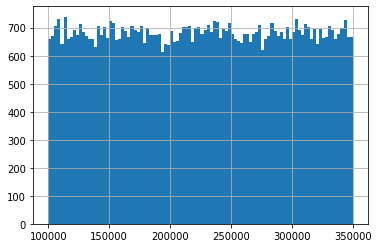

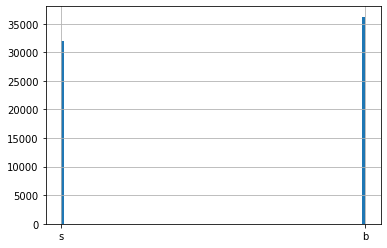

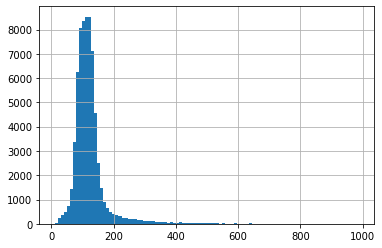

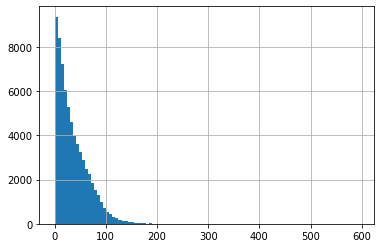

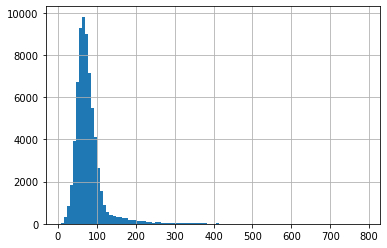

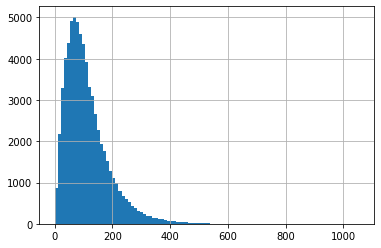

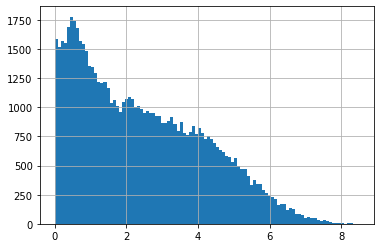

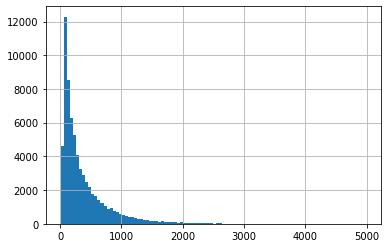

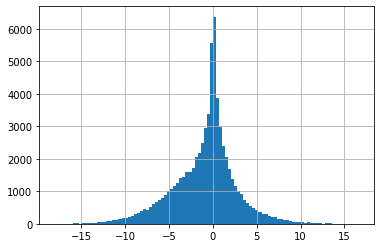

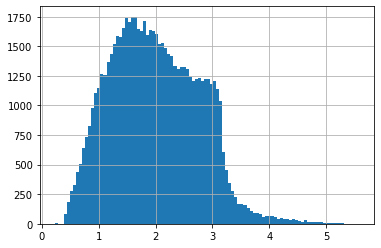

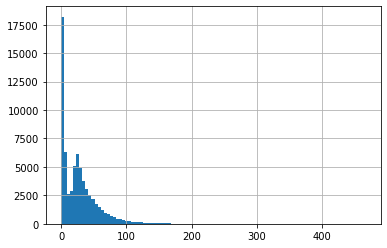

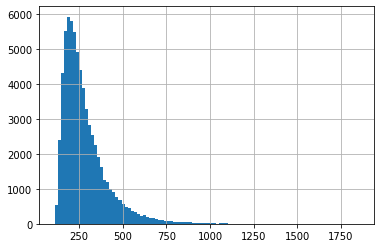

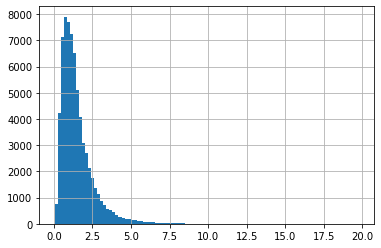

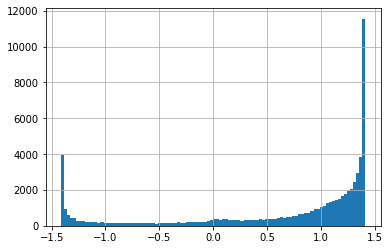

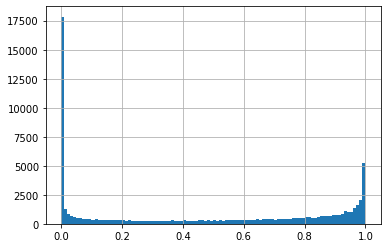

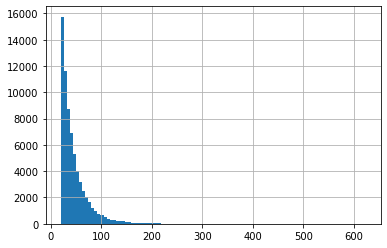

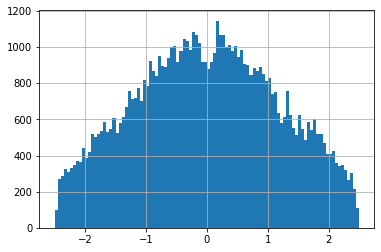

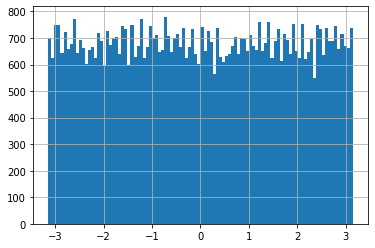

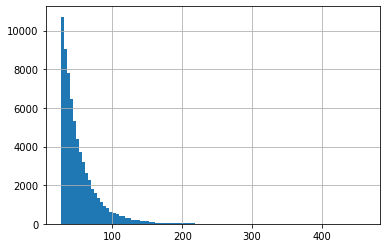

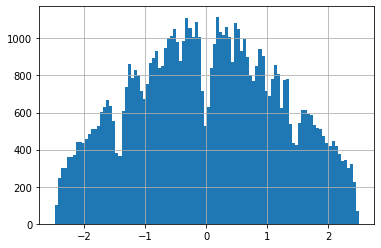

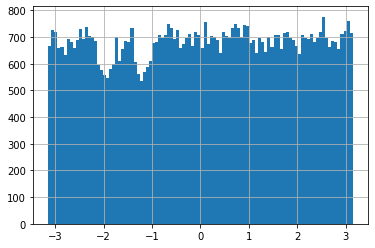

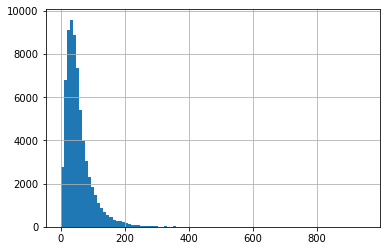

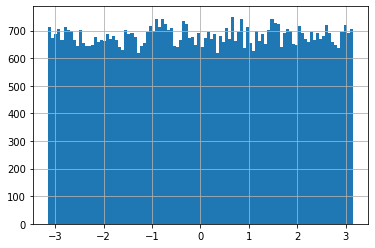

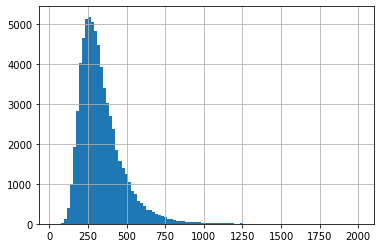

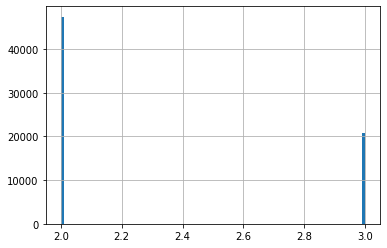

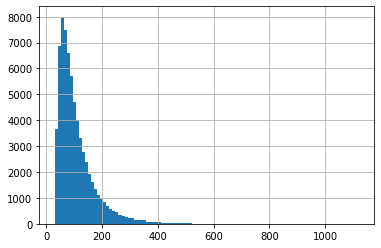

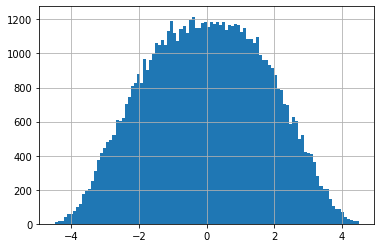

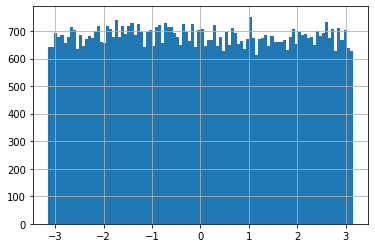

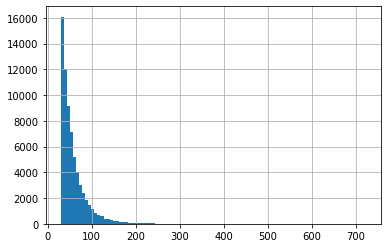

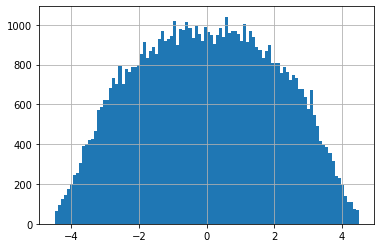

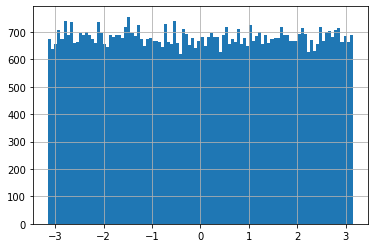

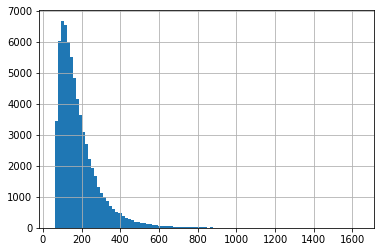

In [11]:
for column in train_data.columns:
    train_data[column].hist(bins=100)
    plt.show()

In [12]:
train_data.shape

(68114, 32)

In [13]:
train_data['Prediction'] = train_data['Prediction'].apply(lambda x: int(x=='b'))
train_data.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,0,138.470,51.655,97.827,27.980,0.910,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.240,-2.475,113.497
5,100005,1,89.744,13.550,59.149,116.344,2.636,284.584,-0.540,1.362,...,2.237,282.849,3,90.547,-2.412,-0.653,56.165,0.224,3.106,193.660
6,100006,0,148.754,28.862,107.782,106.130,0.733,158.359,0.113,2.941,...,-1.443,294.074,2,123.010,0.864,1.450,56.867,0.131,-2.767,179.877
11,100011,1,114.744,10.286,75.712,30.816,2.563,252.599,-1.401,2.888,...,2.148,290.547,3,76.773,-0.790,0.303,56.876,1.773,-2.079,165.640
23,100023,0,141.481,0.736,111.581,174.075,1.955,364.344,-0.923,1.335,...,-0.973,454.785,2,195.533,1.156,1.416,82.477,-0.798,-2.785,278.009


In [14]:
print(train_data[train_data['Prediction']==1]['Id'].count())
print(train_data[train_data['Prediction']==0]['Id'].count())

36220
31894


# Standardizing data

In [15]:
def standardize(df):
    for column in df.columns:
        if column == 'Id':
            continue
        df[column] = (df[column]-df[column].min())/(df[column].max()-df[column].min())
    return df

In [16]:
train_data = standardize(train_data)
train_data.describe()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
count,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,...,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000,68114.000000
mean,225035.224154,0.531756,0.115441,0.059349,0.090982,0.105639,0.286279,0.073483,0.495045,0.330504,...,0.501112,0.152491,0.303711,0.070328,0.499245,0.498239,0.040372,0.498563,0.499239,0.078280
std,72243.940540,0.498994,0.062098,0.051743,0.052069,0.072430,0.205892,0.080781,0.103492,0.144765,...,0.288653,0.071011,0.459863,0.062516,0.194135,0.287964,0.046604,0.227118,0.289186,0.068848
min,100000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,162349.750000,0.000000,0.085291,0.019048,0.063850,0.054767,0.105492,0.020128,0.441810,0.218464,...,0.253342,0.104001,0.000000,0.028108,0.351045,0.249562,0.010691,0.319028,0.248727,0.031305
50%,225288.000000,1.000000,0.105642,0.045372,0.081308,0.089774,0.252440,0.044094,0.512243,0.319940,...,0.500796,0.137510,0.000000,0.052434,0.499889,0.494986,0.026185,0.498444,0.498727,0.059695
75%,287772.750000,1.000000,0.126316,0.087841,0.103607,0.138281,0.439962,0.095910,0.546955,0.438423,...,0.750318,0.183819,1.000000,0.092512,0.647732,0.748050,0.053433,0.678222,0.750318,0.103846
max,349994.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Augmentation functions

In [48]:
def feature_polynomial_expansion(x, columns, d):
    if d == 0:
        new_x = x.drop(columns, axis=1)
        return new_x
    
    new_x = x.copy()
    for column in columns:
        for i in range(2,d+1):
            new_x[f'{column}^{i}'] = x[column] ** i
            
    return new_x

In [18]:
def add_constant_attribute(x):
    N, _ = x.shape
    new_x = x.copy()
    new_x['Constant'] = 1
    return new_x

# Splitting function

In [19]:
def split (data, ycolumn, train_ratio=0.75, seed=42):
    np.random.seed(seed)
    
    # default extreme value for train_ratio
    if train_ratio > 0.90:
        train_ratio = 0.90
    train_size = round(train_ratio * len(data))
    
    boson = data[data[ycolumn]==1].to_numpy()
    spiner = data[data[ycolumn]==0].to_numpy()
    np.random.shuffle(boson)
    np.random.shuffle(spiner)
    train = np.concatenate((boson[:round(train_size/2)], spiner[:round(train_size/2)]))
    test = np.concatenate((boson[round(train_size/2):], spiner[round(train_size/2):]))
    
    columns = data.columns
    return pd.DataFrame(train, columns=columns), pd.DataFrame(test, columns=columns)

# Predicting functions

In [20]:
def predict(x, w):
    p = sigmoid(np.dot(x,w))
    return np.array([int(i>0.5) for i in p])

def get_accuracy(y,y_predict):
    return 1 - np.sum(abs(y-y_predict))/ len(y)     

def get_recall(y,y_predict):
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y)

def get_precision(y,y_predict):
    return np.count_nonzero(np.logical_and(y,y_predict)) / np.count_nonzero(y_predict)

def evaluate_on_set(w, x, y):
    y_predict = predict(x, w)
    accuracy = get_accuracy(y,y_predict)
    recall = get_recall(y,y_predict)
    precision = get_precision(y,y_predict)
    f1_score = 2*recall*precision/(recall+precision)
    return {'accuracy' : accuracy, 'recall': recall, 'precision':precision, 'f1_score':f1_score}


In [21]:
y = np.array([0,1,23])
x = np.array([1,0,2])
r = np.logical_and(x, y)
np.count_nonzero(r)

1

# Transform data

In [22]:
def split_train_test(data):
    train_df, test_df = split(data, 'Prediction')
    x_train = train_df.drop(['Id', 'Prediction'], axis=1)
    y_train = train_df['Prediction']
    x_test = test_df.drop(['Id', 'Prediction'], axis=1)
    y_test = test_df['Prediction']
    return x_train.values, y_train.values, x_test.values, y_test.values

# Experiment 1

iteration 0: loss: 4.49807659829704, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 4.493634612982297, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 4.493592575913526, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 3: loss: 4.488482807870368, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270

iteration 32: loss: 4.441647002414378, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 4.435494068174806, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 4.430986327331864, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 35: loss: 4.430943560989903, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0

iteration 64: loss: 4.361832705737253, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 4.361791913360295, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 66: loss: 4.35601378830527, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 67: loss: 4.350433924233511, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.

iteration 96: loss: 4.285958085367181, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 97: loss: 4.285915438563954, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 98: loss: 4.278938677551291, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 99: loss: 4.278897484415789, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0

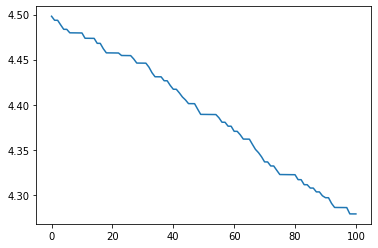

lambda = 0.01; gamma = 0.001
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}


,lambda,gamma,iteration,loss,acc_train,prec_train,recall_train,f1_train,acc_test,prec_test,...,w_141,w_142,w_143,w_144,w_145,w_146,w_147,w_148,w_149,w_150
0,0.01,0.001,0,4.498077,0.5,0.5,1.0,0.666667,0.627026,0.627026,...,0.109222,0.332194,0.249116,0.199310,0.166115,0.010786,0.002314,0.00072,0.000308,0.998990
0,0.01,0.001,1,4.493635,0.5,0.5,1.0,0.666667,0.627026,0.627026,...,0.109220,0.331999,0.249029,0.199271,0.166097,0.010768,0.002311,0.00072,0.000308,0.997980
0,0.01,0.001,2,4.493593,0.5,0.5,1.0,0.666667,0.627026,0.627026,...,0.109219,0.331996,0.249028,0.199270,0.166096,0.010768,0.002311,0.00072,0.000308,0.997971
0,0.01,0.001,3,4.488483,0.5,0.5,1.0,0.666667,0.627026,0.627026,...,0.109216,0.331836,0.248963,0.199243,0.166085,0.010767,0.002311,0.00072,0.000308,0.996961
0,0.01,0.001,4,4.483588,0.5,0.5,1.0,0.666667,0.627026,0.627026,...,0.109078,0.331613,0.248857,0.199193,0.166060,0.010764,0.002311,0.00072,0.000308,0.995951


In [50]:
'''
columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, 5)
curr_data = add_constant_attribute(curr_data)

x_train, y_train, x_test, y_test = split_train_test(curr_data)

lambda_ = 0.01
gamma = 0.001
max_iters = 100
initial_w = x_train.mean(axis=0)

w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, log=f'Test.csv')
plt.plot(loss)
plt.show()
    
print(f'lambda = {lambda_}; gamma = {gamma}')
print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

df.head()
'''

iteration 0: loss: 3.1917250612335026, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.163413169201834, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.1237133420368752, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 3: loss: 3.0939992186507674, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.

iteration 32: loss: 2.50321379057034, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 2.4734087272246956, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 2.4454194322496083, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 35: loss: 2.4455538177315326, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.1481785551660963, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.1490470106517305, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 2.149851535906518, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 66: loss: 2.1500773601731398, 

iteration 93: loss: 1.6925712682765846, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 1.6591323338012594, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 1.6407189699832476, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 1.642186886793982, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

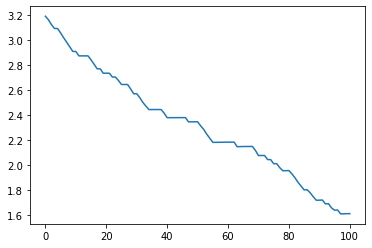

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.77807003198936, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.777730130467805, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7363212267108143, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'r

iteration 30: loss: 3.2105069013995258, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.166017262493862, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.1657583310287465, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.165507209848931, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 60: loss: 2.4395211543076507, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 2.4017446524582304, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.3595249276516244, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.3173096548202854, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy

iteration 90: loss: 1.8281167216735112, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 91: loss: 1.8288038498408157, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 1.7841600387360215, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 1.7499610098854512, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy

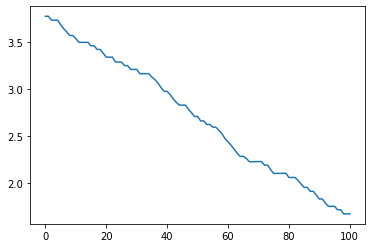

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 4.1302914768495365, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 4.07737078694999, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 4.036014714066515, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'r

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.355952203583295, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.355651390544607, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.355401846372935, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.3550892348987964, pr

iteration 62: loss: 2.726905118324369, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.7267060092193214, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.682810200998625, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 2.682704903757389, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

iteration 94: loss: 2.212838474642538, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 2.213068774837863, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 2.1758595521162323, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 97: loss: 2.175982615625911, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

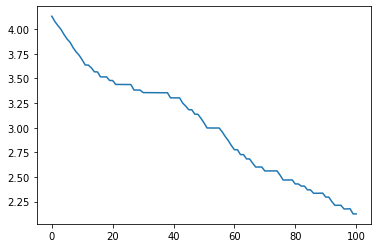

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 4.502370400899324, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 4.501929901225916, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 4.501494780557123, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'r


iteration 29: loss: 3.8619862846040367, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.8617122641792982, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.861329322452228, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.813439378778408, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 59: loss: 3.2304879005267737, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 60: loss: 3.191936983899235, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 3.1916387124521624, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 3.1348094391489947, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 91: loss: 2.652491956429953, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 2.652374615472608, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 2.6066860370412708, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 2.6065757994197076, p

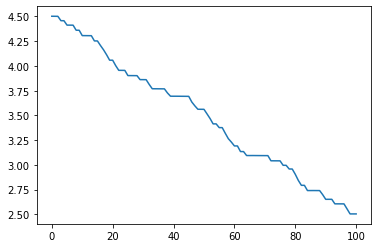

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.73830428360908, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.738484464225533, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.738529187352639, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 're

iteration 29: loss: 3.2548077105829925, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.2095233499207927, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.2096060342379644, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.209689069495052, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 61: loss: 2.725997510807082, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.7264683641907137, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.687578632143983, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.687735773087035, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

iteration 91: loss: 2.466474778729337, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 2.4665933710330705, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 2.4667139082818648, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 2.4670604667928564, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

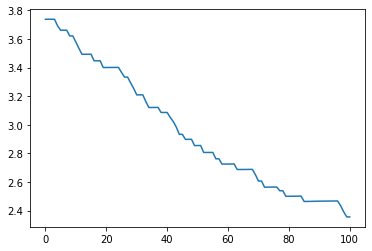

lambda = 0.0001; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.778408823351242, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.743925062956137, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.704509904968057, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 

iteration 31: loss: 3.3264665637150306, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.3264634200649548, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.326546260162519, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 3.2906586330689724, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.7335824505442443, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.733812770814473, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 2.7000489015599523, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 66: loss: 2.6629037158831093, 

iteration 95: loss: 2.0661527173998593, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 2.0279647990092977, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 97: loss: 2.02851766814377, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 98: loss: 1.988890493144408, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

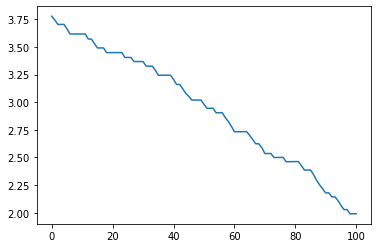

lambda = 0.0005; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.7783721601889755, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7392793353135807, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7058446145324795, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.627026074700493

iteration 29: loss: 3.2468671407860894, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.20696829902181, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.1643613733810048, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.132317889532802, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

iteration 59: loss: 2.531596377132766, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 60: loss: 2.5322923444240937, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 2.4952207739052494, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.495771328910688, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 91: loss: 1.9802502181596489, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 1.981789180333193, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 1.9498450566588823, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 1.9512491222935353, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

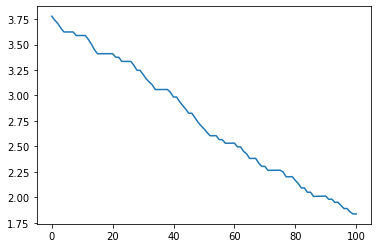

lambda = 0.001; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.7782339916086625, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7284373435212963, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.728286755206956, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933,

iteration 30: loss: 3.0718945383560268, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.071984458424664, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.071942393112226, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.071881454229505, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 


iteration 62: loss: 2.440515099937376, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.44127107175217, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.4412849406972534, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 2.40553559862555, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0

iteration 94: loss: 2.009307477140914, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 1.9813988214345675, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 1.952051731019095, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 97: loss: 1.9188315677398424, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

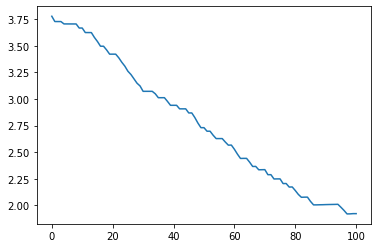

lambda = 0.005; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.7494032626569043, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7135740738110457, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7133674570765516, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933

iteration 29: loss: 3.1162972529539874, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.1161570121478315, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.075748291006642, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.075625903577186, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 60: loss: 2.497631970041879, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 2.456693070484949, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.4200489824243743, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.379176746736555, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

iteration 91: loss: 2.0503489098873446, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 2.0199816724726105, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 1.982443317180694, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 1.9834005989843155, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

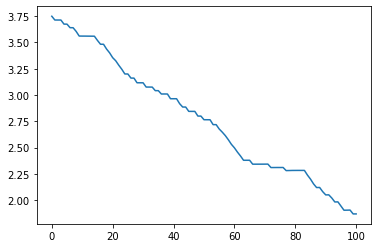

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.733762857615547, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.732140272223892, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.6947102059676276, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, '

iteration 29: loss: 3.182027047027399, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.1369464063461523, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.135681395328708, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.134139924117798, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 


iteration 61: loss: 2.5146830532137674, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.513761927204783, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.512730204619081, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.5116641250105913, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 92: loss: 1.938825510812274, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 1.9100283856497877, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 1.8774032455582643, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 1.833911261473038, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

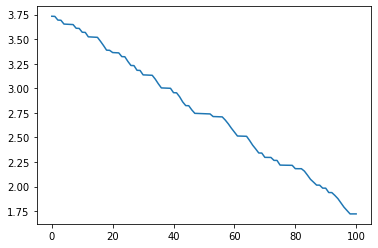

lambda = 0.05; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.77463801353094, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.738742531763662, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.6998534333698014, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'r

iteration 31: loss: 3.0946265891058915, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.0547444387347187, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.051947597963031, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 3.0056308708673027, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 63: loss: 2.4131252190724983, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 2.3764986887479593, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 2.3747201138596505, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 66: loss: 2.3732649477249605, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy

iteration 93: loss: 1.79183453477365, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 1.7534496501599859, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 1.753437530384153, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 1.7078977187497253, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

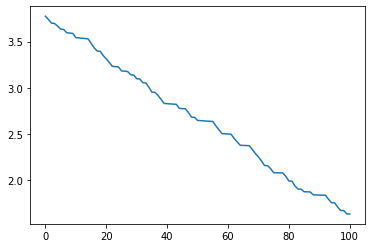

lambda = 0.1; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.721696346888172, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.658745372091389, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.6405532969015972, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'r

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 2.5987886810548515, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 2.5863661949464642, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 2.544028181798358, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 2.496795621923363, p

iteration 62: loss: 1.6819996748785406, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 1.675818238379, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 1.6423661239332914, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 1.6363196649633678, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0

iteration 94: loss: 1.136713856031824, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 1.1365279767646495, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 1.1363182631693773, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 97: loss: 1.135704828421227, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

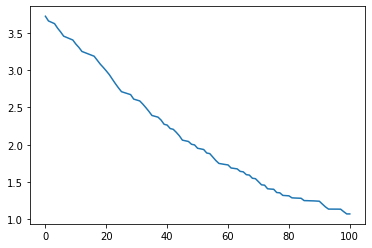

lambda = 0.5; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.74072221034082, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.666153900723624, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.629631133960339, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'rec

iteration 31: loss: 2.1887552158994827, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 2.1382588844885624, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 2.0733593667475207, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 2.0540714451949476, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy

iteration 62: loss: 1.2863851270004558, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 1.244382338837171, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 1.2371590955512475, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 1.193018092606945, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 92: loss: 0.9251895512723428, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 0.8937275264007851, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 0.8947411655979778, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 0.8736907152291297, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy

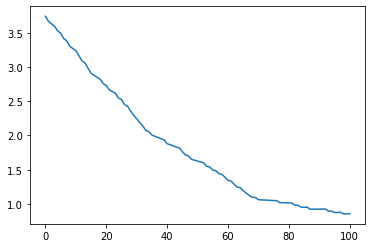

lambda = 1; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.778359214354067, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7783202680800354, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.778280840193618, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'rec

iteration 29: loss: 3.7776117577293737, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.777573369596261, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.7775730125501465, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.7775268252204808, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 61: loss: 3.7771172317795343, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 3.777080515352183, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 3.7770801601044055, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 3.777038771797865, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 91: loss: 3.7764884777740617, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 3.7764881425585934, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 3.7764878219148774, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 3.776438139093458, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

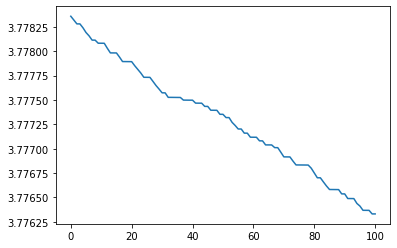

lambda = 0.01; gamma = 1e-05
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.778376377539397, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7764635952996106, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.77644570702383, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, '

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.7456266558672757, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.7436634378456937, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.7436491565818026, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 34: loss: 3.741527298756051, 

iteration 62: loss: 3.718692955516894, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 3.717355960859413, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 3.7173377863038177, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 65: loss: 3.7153848070889888, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy':

iteration 92: loss: 3.681400444064323, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 3.6792723197958113, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 3.677131111606245, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 3.677114909647809, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

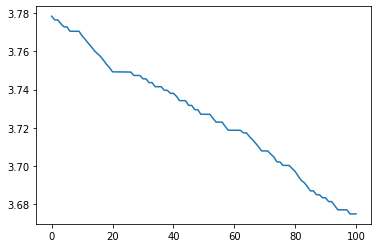

lambda = 0.01; gamma = 0.0005
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.773824592030059, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7737878227167756, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7737523674212596, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933

iteration 29: loss: 3.7236904555008064, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.7192081692746193, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.719173357297157, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.7146211048661586, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 59: loss: 3.6495619011837497, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 60: loss: 3.6495275589889045, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 3.6494925618656997, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 3.644844939658353, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 90: loss: 3.612733457797176, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 91: loss: 3.6082570856824763, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 3.604566849823655, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 3.601062356230691, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

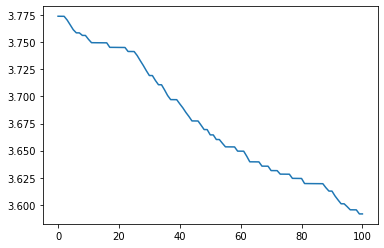

lambda = 0.01; gamma = 0.001
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.7620801295763746, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7403265929161034, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7401743366914344, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 30: loss: 3.410309180786156, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.3887848770843005, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.3886232502034677, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.3884899723361475, 

precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 3.0229351083458234, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 3.0228744892070756, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 3.022825643932711, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 64: loss: 3.0031621774813724, 

iteration 93: loss: 2.6962581588984302, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 94: loss: 2.696243016678114, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 95: loss: 2.696406759966636, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 96: loss: 2.675344625027155, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 

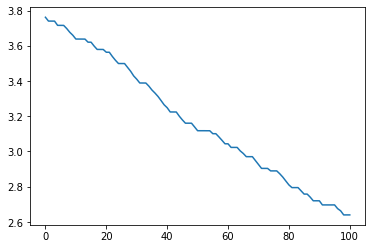

lambda = 0.01; gamma = 0.005
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}
iteration 0: loss: 3.7780535296989264, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 1: loss: 3.7777001305100883, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 2: loss: 3.7465994483820135, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933

iteration 30: loss: 3.21018541993292, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 31: loss: 3.1713248707415653, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 32: loss: 3.171088236571682, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 33: loss: 3.170798315322283, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0

iteration 60: loss: 2.5749976702050383, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 61: loss: 2.5324499799204676, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 62: loss: 2.4863310754745145, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 63: loss: 2.449388730155589, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

iteration 90: loss: 2.0543741800884714, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 91: loss: 2.054935528303403, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 92: loss: 2.0553142129594186, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}

iteration 93: loss: 2.0553877288418043, precision on train: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
precision on test: {'accuracy'

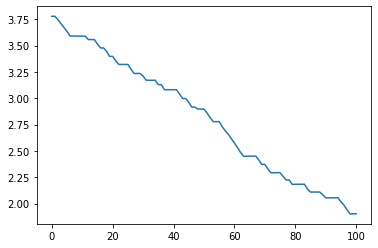

lambda = 0.01; gamma = 0.01
TRAIN precision: {'accuracy': 0.5, 'recall': 1.0, 'precision': 0.5, 'f1_score': 0.6666666666666666}
TEST precision: {'accuracy': 0.6270260747004933, 'recall': 1.0, 'precision': 0.6270260747004933, 'f1_score': 0.7707634001082838}


In [54]:
def_lambda_ = 0.01
def_gamma = 0.01
def_d = 3
max_iters = 10000000

lambda_range = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]
gamma_range = [0.00001, 0.0005, 0.001, 0.005, 0.01]
d_range = [2,3,4,5]

for d in d_range:
    columns = train_data.columns[2:]
    curr_data = feature_polynomial_expansion(train_data, columns, d)
    curr_data = add_constant_attribute(curr_data)

    x_train, y_train, x_test, y_test = split_train_test(curr_data)
    initial_w = x_train.mean(axis=0)
    
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            def_gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={d};gamma={def_gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.savefig(f'd={d};gamma={def_gamma};lambda={def_lambda_}.png')
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

columns = train_data.columns[2:]
curr_data = feature_polynomial_expansion(train_data, columns, def_d)
curr_data = add_constant_attribute(curr_data)
x_train, y_train, x_test, y_test = split_train_test(curr_data)
initial_w = x_train.mean(axis=0)

for lambda_ in lambda_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, 
                                            def_gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={def_gamma};lambda={lambda_}.csv')
    plt.plot(loss)
    plt.savefig(f'd={def_d};gamma={def_gamma};lambda={lambda_}.png')
    plt.show()
    
    print(f'lambda = {lambda_}; gamma = {def_gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

    
    
for gamma in gamma_range:
    w, loss, df = reg_logistic_regression(y_train, x_train, def_lambda_, initial_w, max_iters, 
                                            gamma, frequency=max_iters/100, x_test=x_test, y_test=y_test, 
                                          log=f'd={def_d};gamma={gamma};lambda={def_lambda_}.csv')
    plt.plot(loss)
    plt.savefig(f'd={def_d};gamma={gamma};lambda={def_lambda_}.png')
    plt.show()
    
    print(f'lambda = {def_lambda_}; gamma = {gamma}')
    print(f'TRAIN precision: {evaluate_on_set(w,x_train, y_train)}')
    print(f'TEST precision: {evaluate_on_set(w,x_test, y_test)}')

array([2. , 2.5, 3. ])

In [51]:
from sklearn import feature_selection

columns = train_data.columns[2:]
data = feature_polynomial_expansion(train_data, columns, 10).drop(['Prediction','Id'], axis=1)
p_val = feature_selection.f_classif(data, train_data['Prediction'])[1]


In [52]:
useful_stat = pd.DataFrame(p_val, columns=['p_value'], index=data.columns).sort_values('p_value', ascending=False)

In [53]:
useful_stat[useful_stat['p_value']>0.05]

,p_value
PRI_met_phi^9,0.944833
PRI_met_phi^8,0.919454
DER_pt_h^7,0.869661
PRI_met^5,0.858020
PRI_lep_phi^10,0.842669
...,...
PRI_jet_subleading_phi^3,0.059529
PRI_jet_leading_phi^3,0.058573
PRI_lep_pt^8,0.057125
PRI_jet_subleading_phi,0.056163
